Framentadura de su paisàgiu
===========================

Custa est una versioni zoom-ada apitzus de sa Sardìnnia de [s' infogràfica](https://www.eea.europa.eu/data-and-maps/figures/landscape-fragmentation-per-1-km2-3) de s' Agentzia
Europea po sa Naturalesa.

Màgini zoom-ada
---------------

Amostaus sa màgini zoom-ada de sa Sardìnnia chi dd' iant aprontada cun GIMP.

[0. 0. 0. 0.]
[0.6039216 0.        0.        1.       ]
[0.8 0.  0.  1. ]
[1.         0.22352941 0.         1.        ]
[1.         0.48235294 0.         1.        ]
[1.         0.83137256 0.         1.        ]
[1. 1. 0. 1.]
[1.         1.         0.18039216 1.        ]
[1.        1.        0.7882353 1.       ]
[1. 1. 1. 1.]


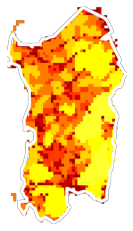

In [60]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np

# Reading PNG image file
def _get_image():
    return img.imread(
        "image-preparation/Landscape-fragmentation6-cropped-upscaled-colorized-recropped.png"
    )


im = _get_image()
colors = np.unique(im.reshape(-1, im.shape[2]), axis=0)

# Show image
plt.imshow(im)
plt.axis('off')

for curr_color in colors:
    print(curr_color)

Paràmetrus de s' infogràfica
----------------------------

Imposta totu s' infogràfica.

In [61]:
import sys
import os
sys.path.append(os.path.dirname(os.path.abspath('')))

import helpers
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def _create_default_image_canvas(style_options, figure_size_inches):
    fig = plt.figure(
        figsize=figure_size_inches,
        dpi=100,
        facecolor=style_options["background_color"],
        tight_layout=True,
    )
    grid = gridspec.GridSpec(
        2, 2, height_ratios=[0.5, 0.5], width_ratios=[0.70, 0.3], hspace=0.01
    )

    axes = [fig.add_subplot(grid[:, 0]), fig.add_subplot(grid[0, 1])]
    return (fig, axes)


def _plot_main_map(ax):
    im = _get_image()
    ax.imshow(im)

    # No box around plot
    ax.set_axis_off()


def _get_labels_from_classes(classes, colors):
    labels = []
    for num_label in range(0, len(colors)):
        if num_label < len(colors) - 1:
            curr_label = f"{classes[num_label]} - {classes[num_label+1]}"
        else:
            curr_label = f"> {classes[num_label]}"
        labels.append(curr_label)
    return labels


def _plot_legend(ax, colors, classes, title, style_options):
    from matplotlib.patches import Patch
    
    # No box around plot
    ax.set_axis_off()
    labels = _get_labels_from_classes(classes, colors)

    legend_elements = [
        Patch(facecolor=color, edgecolor=style_options["foreground_color"], label=label)
        for color, label in zip(colors, labels)
    ]
    
    ax.legend(
        handles=legend_elements,
        loc="center",
        ncol=1,
        facecolor=style_options["background_color"],
        fontsize=style_options["tick_label_size"],
        title_fontsize=style_options["axis_label_size"],
        title=title,
        frameon=False
    )

In [62]:
import helpers

def _get_colors_and_classes():
    html_colors = ["ffff2e", "ffd400", "ff7b00", "ff3900", "cc0000", "9a0000"]
    classes = [0, 5, 10, 25, 50, 100]
    rgb_colors = [helpers.html_to_rgb(color) for color in html_colors]
    return (rgb_colors, classes)

def _plot_whole_infographic(title, legend_title, description, info, horizontal_offset_description=0):
    # Overall settings
    style_options = helpers.set_style()
    colors, classes = _get_colors_and_classes()

    figure_size_inches = (8, 8)
    fig, axes = _create_default_image_canvas(style_options, figure_size_inches)

    _plot_main_map(axes[0])

    _plot_legend(axes[1], colors, classes, legend_title, style_options)

    # Add text
    fig.suptitle(title, fontsize=style_options["title_size"], fontweight="bold")

    plt.figtext(
        0.99,
        0.5,
        info,
        rotation=90,
        ha="center",
        va="center",
        fontsize=style_options["small_text_size"],
        c=style_options["description_text_color"],
    )

    plt.figtext(
        0.02,
        0.02,
        "@sustsardinia",
        ha="left",
        va="center",
        fontdict={
            "size": style_options["tick_label_size"],
            "weight": "bold",
            "color": style_options["description_text_color"],
        },
    )
    plt.figtext(
        0.65+horizontal_offset_description,
        0.25,
        helpers.break_text(
            description, int(style_options["max_description_text_characters"]*0.3)
        ),
        ha="left",
        va="center",
        wrap=True,
        fontdict={
            "size": style_options["description_text_size"],
            "color": style_options["description_text_color"],
        },
    )
    

/tmp/ipykernel_803/1329264798.py:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("figures/srd.png")


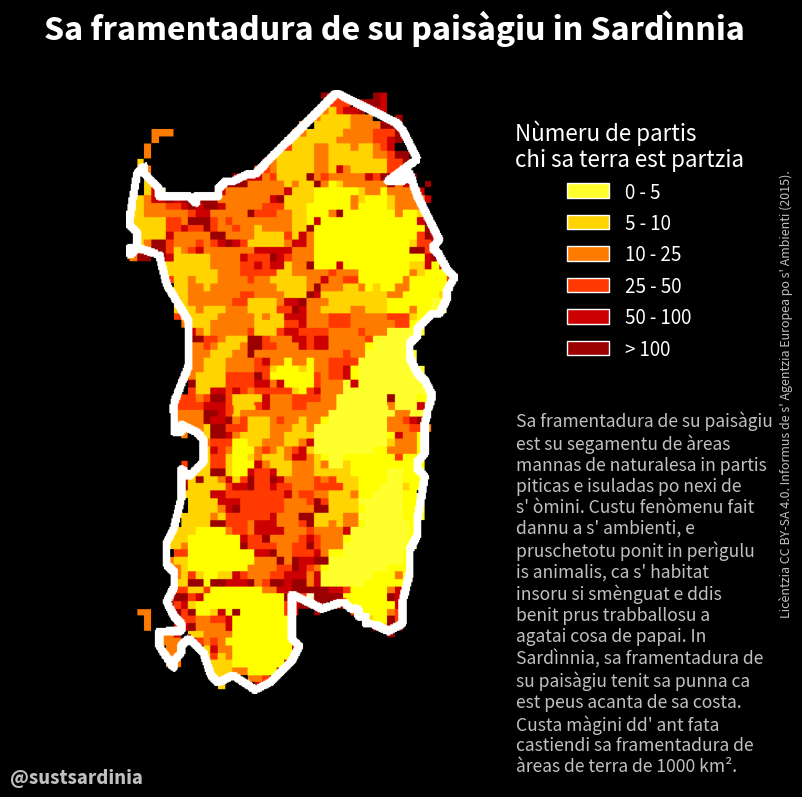

In [66]:
_plot_whole_infographic(
    title="Sa framentadura de su paisàgiu in Sardìnnia", 
    legend_title="Nùmeru de partis\nchi sa terra est partzia", 
    description="Sa framentadura de su paisàgiu est su segamentu de àreas mannas de naturalesa in partis piticas e isuladas po nexi de s' òmini. Custu fenòmenu fait dannu a s' ambienti, e pruschetotu ponit in perìgulu is animalis, ca s' habitat insoru si smènguat e ddis benit prus trabballosu a agatai cosa de papai. In Sardìnnia, sa framentadura de su paisàgiu tenit sa punna ca est peus acanta de sa costa. Custa màgini dd' ant fata castiendi sa framentadura de àreas de terra de 1000 km².", 
    info="Licèntzia CC BY-SA 4.0. Informus de s' Agentzia Europea po s' Ambienti (2015).",
    horizontal_offset_description=0.002
)
plt.savefig("figures/srd.png")


/tmp/ipykernel_803/2701908906.py:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("figures/ita.png")


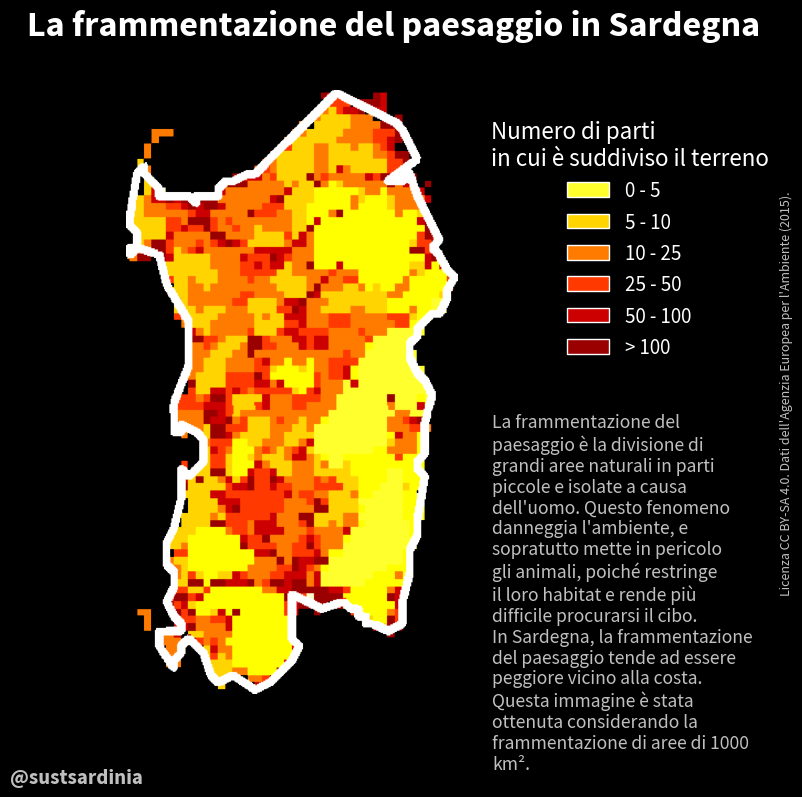

In [67]:
_plot_whole_infographic(
    title="La frammentazione del paesaggio in Sardegna", 
    legend_title="Numero di parti\nin cui è suddiviso il terreno", 
    description="La frammentazione del paesaggio è la divisione di grandi aree naturali in parti piccole e isolate a causa dell'uomo. Questo fenomeno danneggia l'ambiente, e sopratutto mette in pericolo gli animali, poiché restringe il loro habitat e rende più difficile procurarsi il cibo. In Sardegna, la frammentazione del paesaggio tende ad essere peggiore vicino alla costa. Questa immagine è stata ottenuta considerando la frammentazione di aree di 1000 km².",
    info="Licenza CC BY-SA 4.0. Dati dell'Agenzia Europea per l'Ambiente (2015).",
    horizontal_offset_description=-0.027
)
plt.savefig("figures/ita.png")

/tmp/ipykernel_803/1999294431.py:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("figures/eng.png")


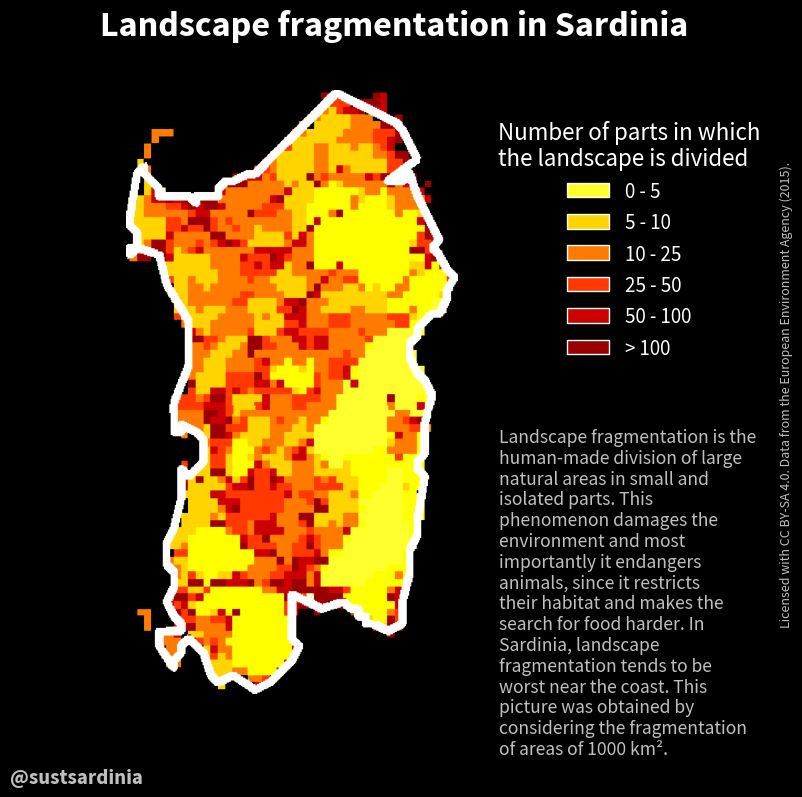

In [68]:
_plot_whole_infographic(
    title="Landscape fragmentation in Sardinia", 
    legend_title="Number of parts in which\nthe landscape is divided", 
    description="Landscape fragmentation is the human-made division of large natural areas in small and isolated parts. This phenomenon damages the environment and most importantly it endangers animals, since it restricts their habitat and makes the search for food harder. In Sardinia, landscape fragmentation tends to be worst near the coast. This picture was obtained by considering the fragmentation of areas of 1000 km².",
    info="Licensed with CC BY-SA 4.0. Data from the European Environment Agency (2015). ",
    horizontal_offset_description=-0.019
)
plt.savefig("figures/eng.png")